#**Lab3: Sound Effects **

Nội dung của bài thực hành này là thiết kế hệ thống xử lý tín hiệu trong miền tần số và trong miền thời gian, thông qua việc thiết kế và sử dụng các bộ lọc thích hợp.


**Sound Equalization:**
Là một ví dụ cơ bản về xử lý trong miền tần số. Dựa vào tính chất của đáp ứng tần số của hệ thống ta có thể "control" được độ lớn của mỗi thành phần tần số ở phía lối ra. Một hệ EQ gồm các bộ lọc thông dải và trọng số gán cho mỗi dải tần số đó. Thay đổi trọng số, ta có thể thay đổi độ lớn của âm trong mỗi dải tần. Do vậy, khi nguồn âm thanh (sound source) vốn là tổ hợp của nhiều dải tần số đi qua bộ EQ, các tín hiệu âm thanh mới sẽ được tạo ra. Cụ thể ta sẽ thực hiện bộ EQ theo hướng dẫn ở bên dưới

Link một số file audio để test:

https://www.dropbox.com/scl/fo/wgxfhkkfv3cogj49cuc1c/AM4z1o7SKyXYOs-fG8ymojk?rlkey=1w97y3yzg27uar90qo9mc6wyz&dl=0


#Phần 1: Tìm hiểu về các bộ lọc trong python

In [ ]:
#Để thiết kế các bộ lọc FIR hoặc IIR ta dùng các hàm trong thư viện scipy.signal:
from scipy.signal  import firwin
## firwin(numtaps, cutoff, *, width=None, window='hamming', pass_zero=True, scale=True, fs=None)[source]
numtaps = 11 # bậc của bộ lọc
fc = 0.2  # tần số chuẩn hoá, fs/2 =  1

hLP_FIR=firwin(numtaps, fc)
hLP_FIR

array([7.39142315e-19, 9.30428315e-03, 4.75777661e-02, 1.22363546e-01,
       2.02246558e-01, 2.37015692e-01, 2.02246558e-01, 1.22363546e-01,
       4.75777661e-02, 9.30428315e-03, 7.39142315e-19])

In [ ]:
# Trong trường hợp cần chuẩn hoá các tham số hoặc chọn cửa sổ :

from scipy.signal import kaiserord, lfilter, firwin, freqz
# The Nyquist rate of the signal.
fs=50
nyq_rate = fs / 2.0
# The cutoff frequency of the filter.
cutoff_hz = 10.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.

width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# Use firwin with a Kaiser window to create a lowpass FIR filter.
hLP_FIR1 = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

hLP_FIR1




array([-3.33564605e-04,  6.46619611e-19,  1.28513257e-03,  1.28816193e-03,
       -1.95847055e-03, -4.60069485e-03,  4.15375822e-18,  8.80733324e-03,
        7.27704786e-03, -9.57486898e-03, -2.01545287e-02,  1.00620313e-17,
        3.36257821e-02,  2.69924578e-02, -3.56480803e-02, -7.88408723e-02,
        1.48742219e-17,  1.98407645e-01,  3.73427520e-01,  3.73427520e-01,
        1.98407645e-01,  1.48742219e-17, -7.88408723e-02, -3.56480803e-02,
        2.69924578e-02,  3.36257821e-02,  1.00620313e-17, -2.01545287e-02,
       -9.57486898e-03,  7.27704786e-03,  8.80733324e-03,  4.15375822e-18,
       -4.60069485e-03, -1.95847055e-03,  1.28816193e-03,  1.28513257e-03,
        6.46619611e-19, -3.33564605e-04])

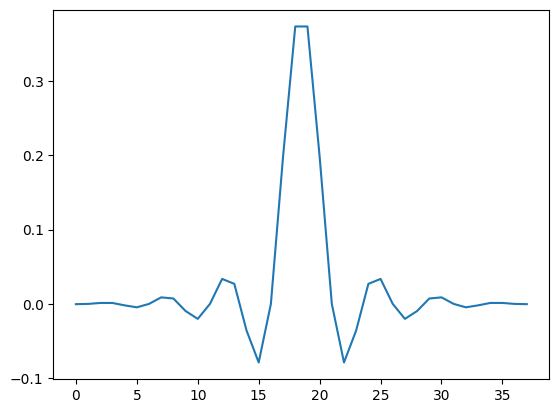

In [ ]:
# Ta có thể hiển thị đáp ứng xung của bộ lọc trong miền thời gian:
import matplotlib.pyplot as plt
plt.plot(hLP_FIR1)
plt.show()



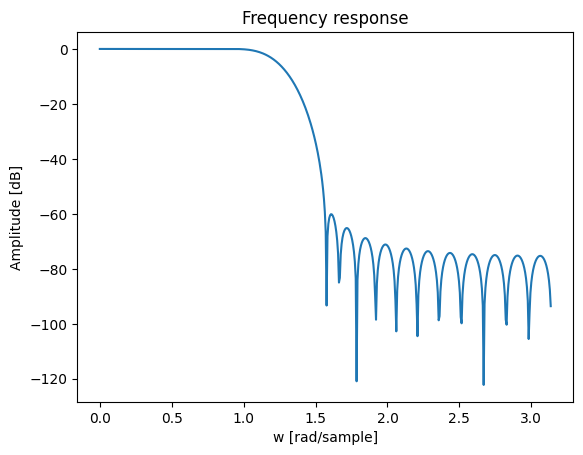

In [ ]:
# Để vẽ đáp ứng tần số của bộ lọc, ta dùng lệnh freqz:

from scipy import signal
import numpy as np
w, h = signal.freqz(hLP_FIR1)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Frequency response')
plt.ylabel('Amplitude [dB]')
plt.xlabel('w [rad/sample]')

plt.show()

In [ ]:
# Để thực hiện bộ lọc Highpass:

# Code here
hHP_FIR1=


# PLot  bộ lọc trong miền thời gian và tần số
# Code here....



In [ ]:
# Để thực hiện bộ lọc Bandpass:

# Code here
hBP_FIR1

# PLot  bộ lọc trong miền thời gian và tần số
# Code here....



In [ ]:
# Để thực hiện bộ lọc Bandstop:
# Code here.....
hBS_FIR1


# PLot  bộ lọc trong miền thời gian và tần số
# Code here...

In [ ]:
# Bây giờ sử dụng bộ lọc IIR:
# Tìm hiểu cách sử dụng hàm iirfilter hoặc butterworth, chebysev... để thiết kế bộ lọc thích hợp
# Vẽ đáp ứng của bộ lọc trong miền thời gian và tần số...



In [ ]:
#IIR lowpass sử dụng Butterworth và ChebysevI, Chebysev2...(Vẽ trên cùng hình....)
#Code here....

In [ ]:
#IIR highpass sử dụng Butterworth và ChebysevI, Chebysev2...(Vẽ trên cùng hình....)
#Code here....

In [ ]:
#IIR bandpass sử dụng Butterworth và ChebysevI, Chebysev2...(Vẽ trên cùng hình....)
#Code here....

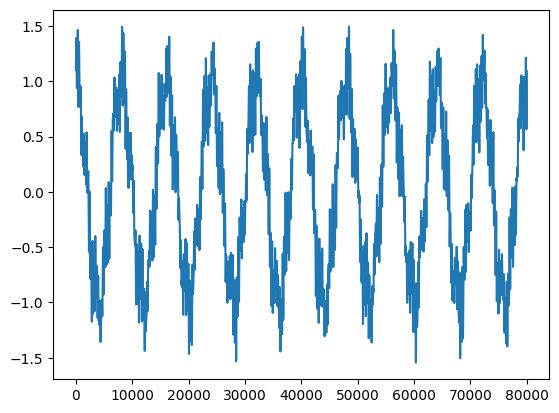

In [ ]:
# Để tính lối ra của tín hiệu khi đi qua hệ thống:
# Ta có thể sử dụng hàm lfilter hoặc theo cách tính convolution:
import numpy as np
from matplotlib.pyplot import plot, show
from numpy import cos, sin, pi
nsamples = 400
t = np.arange(0,20,1/fs)
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)
plot(x)
show()

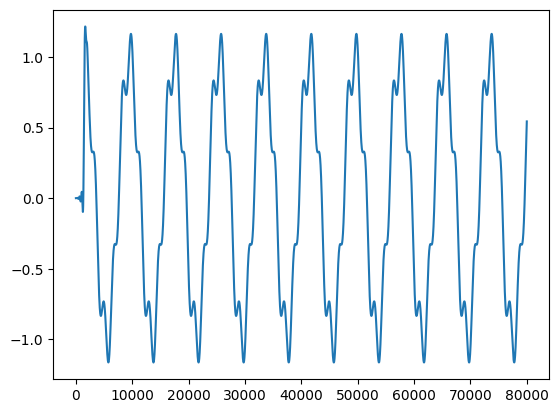

In [ ]:
# Tính toán lối ra bộ lọc
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(h, 1.0, x)
plot(filtered_x)
show()

In [ ]:
# Code sử dụng covolution......
# Xem thêm cách sử dụng ở đây:


#Phần 2: Thiết kế bộ EQ

EQ đơn giản là một hệ gồm các bộ lọc thông dải song song nhau, đầu ra của mỗi bộ lọc được nhân thêm hệ số Gain. Thay đổi Gain, có thể thay đổi độ lớn của mỗi dải tần tương ứng ở đầu ra bộ lọc.
Trong phần đầu tiên, ta chỉ kiểm tra ảnh hưởng và cơ chế hoạt động của EQ bằng cách chia âm thanh thành các 10 hoặc 30 dải tần (như trong slide); các giá trị gain có thể được tuỳ chỉnh. Xác định âm thanh đầu ra tương ứng.

In [ ]:
# Để tiện cho xử lý các file âm thanh lớn, ta có thể sử dụng một số thư viện chuyên dụng cho đọc, ghi các file âm thanh.
# Bên dưới là một ví dụ. SV có thể chọn thư viện khác ....

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
audio = AudioSegment.from_file('file.m4a')

#Phần 2b (Mở rộng): Thiết kế bộ EQ cho phép xử lý tín hiệu trong thời gian thực
Tìm hiểu phương pháp hay cách thức để thực hiện bộ EQ cho tín hiệu âm thanh dài, trong đó,mỗi khi thay đổi hệ số bộ EQ thì âm thanh cũng thay đổi theo đó.
Phần này có thể sử dụng cho dự án cuối khoá sau này, nên SV có thể tìm hiểu dần...

#Phần 3: Xử lý, tạo hiệu ứng âm thanh trong miền thời gian
SV có thể đọc thêm ở https://sound.eti.pg.gda.pl/student/eim/synteza/adamx/eindex.html để hiểu thêm về bài thực hành

**Tạo hiệu ứng tiếng vọng Echo:**

Echo là hiệu ứng âm thanh tương ứng với trễ âm thanh ở đầu vào. Âm thanh lối ra **y(n) = x(n) + k.x(n-D)**; trong đó D là độ trễ, k là hệ số suy giảm. Lưu ý, để có hiệu ứng echo độ trễ D phải lớn, thông thường D = [td*fs], trong độ thời gian trễ td>100ms để cảm nhận được; fs=44,1kHz nên D>4410

Để tạo hiệu ứng Echo, ta sử dụng phương trình sai phân bên trên. x(n) là tín hiệu âm thanh còn x(n-D) là phiên bản trễ của nó. Nói cách khác về mặt cộng tín hiệu ta cộng x với phiên bản dịch D bước của nó.

Một cách khác là sử dụng lọc: biến đổi Z cho phương trình sai phân bên trên từ đó thu được hàm truyền $H(z) =1 + kz^{-D} $

Do đó, đáp ứng xung của hệ thống là $h=[1, 0, 0,...., 0, k]$ trong đó ta có D =4410 số 0 ở giữa.

In [ ]:
# Cách 1: Cộng tín hiệu
# Code here

In [ ]:
# Cách 2: Dùng bộ lọc:
# Code here

Khi có nhiều đường phản xạ, ta có thể mô tả nó bằng hệ thống IIR: Phương trình của hệ thống có dạng $ y(n) = x(n) +ky(n-D)$ hoặc hàm truyền $H(z) =\frac{1}{1 - kz^{-D}} $  
Theo cách này, ta có thể sử dụng phương pháp thiết kế bộ lọc IIR để mô tả hiện tượng tiếng vọng đa đường (Chọn D lớn).

In [ ]:
# Code here ....

**Tạo hiệu ứng tiếng vang Reverb**

Tiếng vang là hiện tượng âm thanh khi truyền trong các môi trường nhỏ hẹp, bị phản xạ trở lại, hoà lẫn với âm vừa phát ra xong. Lượng phản xạ này lớn đến mức tai người không thể cảm nhận được thời điểm. Để mô tả hiện tượng dội âm, người ta thường sử dụng các cấu trúc lọc IIR $H(z) =\frac{1}{1 - kz^{-D}} $ , với D nhỏ hoặc kết hợp với All-pass filter $H(z) =\frac{-k +z^{-D}}{1 - kz^{-D}} $

In [ ]:
# Sử dụng IIR, với D nhỏ
# Code here....






In [ ]:
# Sử dụng IIR +All pass filter
# Code here....

**Mở rộng: **

Thuật toán "Schroeder Reverb" được giới thiệu năm 1972 là một phương pháp nổi tiếng mô tả hiện tượng reverb trong môi trường đặc biệt như nhà thờ, nhà hát...
Cấu trúc bộ lọc "Schroeder Reverb" được giới thiệu ở đây https://www.youtube.com/watch?v=k1SorBkeqlo
Ngoài ra có thể đọc thêm ở đây https://users.utcluj.ro/~atn/papers/ATN_4_2011_10.pdf

Các em có thể tìm hiểu thêm và thực hiện thuật toán này


In [ ]:
# Room Reverb
# Nếu có đáp ứng xung mô tả âm thanh được truyền trong Nhà hát hay nhà thờ, chúng ta có thể tạo âm thanh giống như thế không?
# Ta có thể thử với file này xem ....








**Mô phỏng hiệu ứng Chorus và Flanger**


Đọc trong tài liệu tham khảo....:)


**Mô phỏng hiện tượng Phaser và wah-wah**

**Mô phỏng Tremolo**

**Mô phỏng âm thanh Chipsmusk và Autopus  với resampling.**

Pytorch Audio là 1 thư viện có nhiều hàm hỗ trợ cho xử lý âm thanh. Các em có thể đọc thêm ở đây https://pytorch.org/audio/stable/tutorials/effector_tutorial.html?highlight=audio+effect để biết cách tạo các hiệu ứng âm thanh với API có sẵn

In [ ]:
!pip install  torch
!pip install torchaudio
!pip install torchsummary
!pip install torchmetrics


In [ ]:
# Code cho các hiệu ứng âm thanh dùng Torch Audio.....

# Code here....

import torch
import torchaudio
from torchaudio.io import AudioEffector, CodecConfig

import matplotlib.pyplot as plt
from IPython.display import Audio



In [ ]:
src = torchaudio.utils.download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
waveform, sr = torchaudio.load(src, channels_first=False)

100%|██████████| 106k/106k [00:00<00:00, 5.76MB/s]


In [ ]:
def show(effect, *, stereo=False):
    wf = torch.cat([waveform] * 2, dim=1) if stereo else waveform
    figsize = (6.4, 2.1 if stereo else 1.2)

    effector = AudioEffector(effect=effect, pad_end=False)
    result = effector.apply(wf, int(sr))

    num_channels = result.size(1)
    f, ax = plt.subplots(num_channels, 1, squeeze=False, figsize=figsize, sharex=True)
    for i in range(num_channels):
        ax[i][0].specgram(result[:, i], Fs=sr)
    f.set_tight_layout(True)

    return Audio(result.numpy().T, rate=sr)

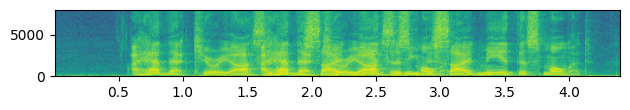

In [ ]:
show("aecho=in_gain=0.5:out_gain=0.88:delays=1000:decays=0.3")